# Data-Preprocessing

### Imports

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix , classification_report

In [11]:
data = pd.read_csv(r'D:\4_Data_Exploration_Project\HAM10000_metadata.csv')

### Gather Information about Data Structure

In [12]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


In [13]:
print(data['dx_type'].unique())
print(data['dx'].unique())
print(data['sex'].unique())
print(data['localization'].unique())

['histo' 'consensus' 'confocal' 'follow_up']
['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
['male' 'female' 'unknown']
['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


C:\Users\andre\Anaconda3\envs\data_expl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


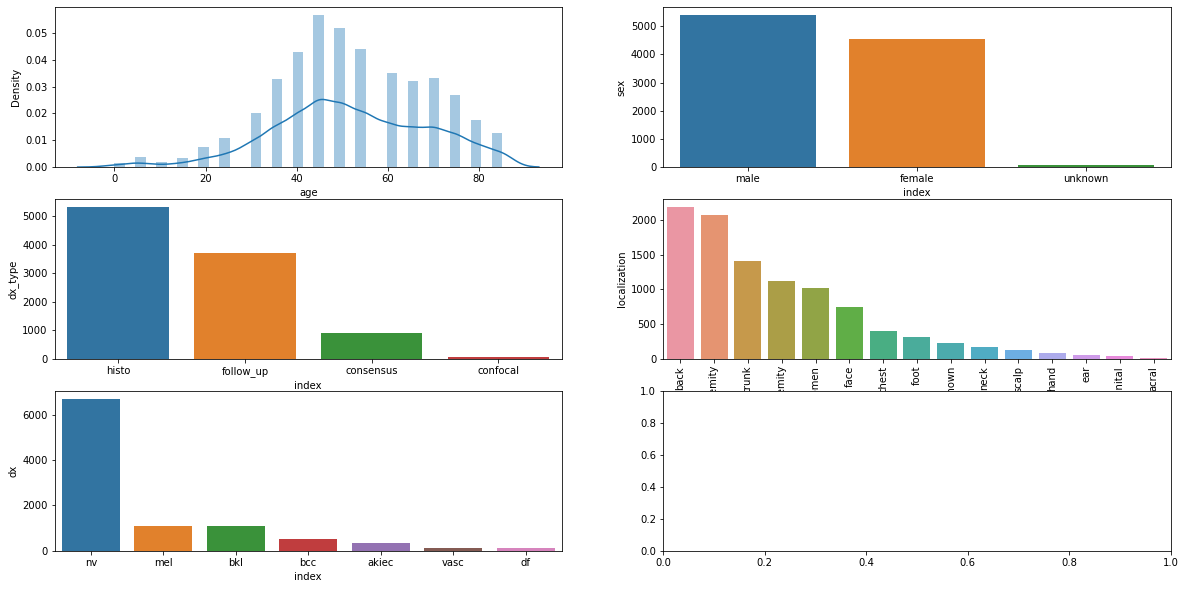

In [14]:
# Labels mit genauer Bezeichnung

fig, ax = plt.subplots(3,2, figsize=(20,10))

sns.distplot(data['age'], ax=ax[0,0])
sns.barplot(data=data['dx_type'].value_counts().reset_index(), x='index', y='dx_type', ax=ax[1,0])
sns.barplot(data=data['dx'].value_counts().reset_index(), x='index', y='dx', ax=ax[2,0])
sns.barplot(data=data['sex'].value_counts().reset_index(), x='index', y='sex', ax=ax[0,1])
sns.barplot(data=data['localization'].value_counts().reset_index(), x='index', y='localization', ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation = 90);

In [15]:
data_pic = pd.read_csv(r'D:\4_Data_Exploration_Project\hmnist_28_28_L.csv')

In [16]:
# Anzeige der Bilder in Farbe

X = data_pic.drop(axis=1, columns='label')
y = data_pic['label']

fig, (ax) = plt.subplots(8, 8, figsize = (10, 10))
k = 0 
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(X.loc[k].values.reshape(28,28
                                              
                                              ))
        ax[i,j].axis('off')
        k += 1  
    plt.tight_layout()

Error in callback <function flush_figures at 0x000001BCE8349288> (for post_execute):


KeyboardInterrupt: 

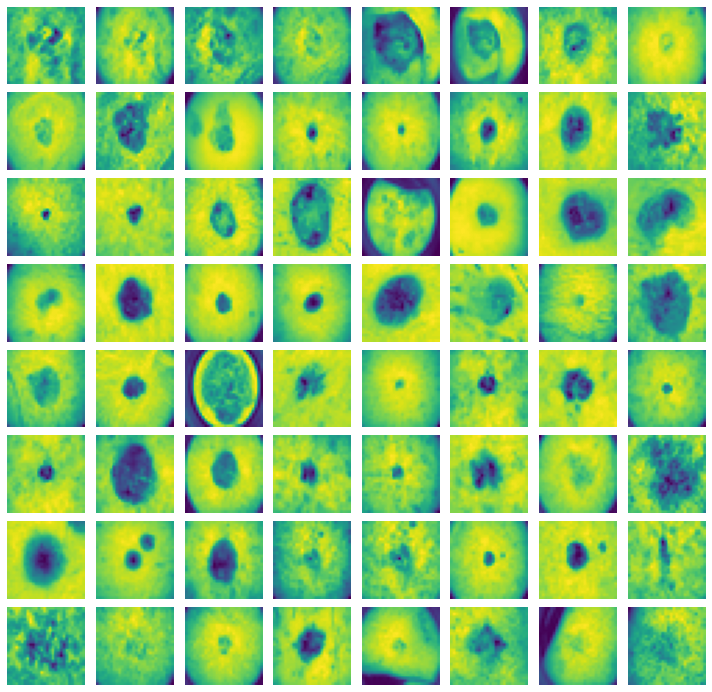

In [17]:
# View Dataset of negatives
data_pic2 = pd.read_csv(r'D:\4_Data_Exploration_Project\hmnist_28_28_L.csv')
picture2 = data_pic2.drop(axis=1, columns='label')

fig, (ax) = plt.subplots(8, 8, figsize = (10, 10))
k = 0 
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(picture2.loc[k].values.reshape(28,28))
        ax[i,j].axis('off')
        k += 1  
    plt.tight_layout()

In [18]:
## Balancing 

### Splitting the Dataset in Test- and Trainig Set
___

In [19]:
# Splitting the data in training and test data of labels and features with 20% test data and 80% training data
# and shuffling 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Reshaping the data to arrange the pixels like in the pictures
X_train = X_train.values.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [21]:
# normalisation
X_train /= 255
X_test /= 255

In [22]:
# Encoding der labels in 7 categories
n_classes = 7
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (8012,)
Shape after one-hot encoding:  (8012, 7)


# Model Creation

In [23]:
# creating a model with 1 convolutional layer, 2 dense layer 

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1))) 
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(7, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history1 = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
63/63 [==============================] - 4s 63ms/step - loss: 1.1808 - accuracy: 0.6598 - val_loss: 1.0964 - val_accuracy: 0.6680
Epoch 2/10
63/63 [==============================] - 3s 55ms/step - loss: 1.0467 - accuracy: 0.6710 - val_loss: 0.9966 - val_accuracy: 0.6680
Epoch 3/10
63/63 [==============================] - 4s 56ms/step - loss: 1.0005 - accuracy: 0.6721 - val_loss: 0.9802 - val_accuracy: 0.6760
Epoch 4/10
63/63 [==============================] - 4s 56ms/step - loss: 0.9563 - accuracy: 0.6833 - val_loss: 0.9582 - val_accuracy: 0.6775
Epoch 5/10
63/63 [==============================] - 4s 58ms/step - loss: 0.9401 - accuracy: 0.6883 - val_loss: 0.9420 - val_accuracy: 0.6860
Epoch 6/10
63/63 [==============================] - 4s 56ms/step - loss: 0.9095 - accuracy: 0.6946 - val_loss: 0.9369 - val_accuracy: 0.6840
Epoch 7/10
63/63 [==============================] - 4s 57ms/step - loss: 0.8912 - accuracy: 0.7019 - val_loss: 0.9390 - val_accuracy: 0.6885
Epoch 8/10
63

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16900)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1690100   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
Total params: 1,691,057
Trainable params: 1,691,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# building a linear stack of layers with the sequential model2
model2 = Sequential()

# convolutional layer
model2.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,3)))

# convolutional layer
model2.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# flatten output of conv
model2.add(Flatten())

# hidden layer
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(250, activation='relu'))
model2.add(Dropout(0.3))
# output layer
model2.add(Dense(7, activation='softmax'))

# compiling the sequential model2
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model2 for 10 epochs
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

In [ ]:
model2.summary()

# Evaluation

In [ ]:
eval = model2.evaluate(X_test, Y_test)

print('test loss, test acc: ' + str(eval[0]) + ', '+ str(eval[1]))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.plot(history2.history["accuracy"] , 'ro-' , label = "Training Accuracy")
ax1.plot(history2.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
ax1.legend()
ax2.set_title('Loss')
plt.plot(history2.history["loss"] , 'ro-' , label = "Training Loss")
plt.plot(history2.history["val_loss"] , 'go-' , label = "Testing Loss")
ax2.legend()
ax1.set_title('Accuracy')
ax2.set_ylim(0, 1)